In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Lipschitz2.csv")
df.head(10)

,Date,Status,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-postal-code,promotion-ids,B2B
0,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,USD,406.0,BENGALURU,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
1,2022-04-30,Shipped,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,USD,329.0,NAVI MUMBAI,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
2,2022-04-30,Shipped,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,1,USD,824.0,GHAZIABAD,201102.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
3,2022-04-30,Shipped,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,1,USD,653.0,CHANDIGARH,160036.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
4,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,1,USD,399.0,HYDERABAD,500032.0,Amazon PLCC Free-Financing Universal Merchant ...,False
5,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,XS,B081XCMYXJ,1,USD,399.0,Amravati.,444606.0,Amazon PLCC Free-Financing Universal Merchant ...,False
6,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,J0351,J0351-SET-L,Set,L,B09CSSQY4F,1,USD,771.0,MUMBAI,400053.0,Amazon PLCC Free-Financing Universal Merchant ...,False
7,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,6XL,B09PY99SVJ,1,USD,544.0,GUNTAKAL,515801.0,Amazon PLCC Free-Financing Universal Merchant ...,False
8,2022-04-30,Shipped,Amazon.in,Expedited,JNE3721,JNE3721-KR-XXL,kurta,XXL,B099FCT65D,1,USD,329.0,JAIPUR,302020.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,JNE3697,JNE3697-KR-XXL,kurta,XXL,B098133PV5,1,USD,458.0,Gurgaon,122004.0,Amazon PLCC Free-Financing Universal Merchant ...,False


In [8]:
df = df.rename(columns={'Sales Channel ': 'Sales Channel'})

In [11]:
import datetime as dt

# Converting 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Encoding some of the categorical variables for modeling
# For simplicity, we'll use Label Encoding here
categorical_cols = ['Status', 'Sales Channel', 'ship-service-level', 'Category', 'currency', 'B2B']
cleaned_data_encoded = pd.get_dummies(df, columns=categorical_cols)

# Displaying the shape and head of the transformed data
cleaned_data_encoded.shape, cleaned_data_encoded.head()

((79458, 37),
         Date    Style              SKU Size        ASIN  Qty  Amount  \
 0 2022-04-30  JNE3781  JNE3781-KR-XXXL  3XL  B09K3WFS32    1   406.0   
 1 2022-04-30  JNE3371    JNE3371-KR-XL   XL  B07WV4JV4D    1   329.0   
 2 2022-04-30   SET264  SET264-KR-NP-XL   XL  B08YN7XDSG    1   824.0   
 3 2022-04-30    J0095      J0095-SET-L    L  B08CMHNWBN    1   653.0   
 4 2022-04-30  JNE3405     JNE3405-KR-S    S  B081WX4G4Q    1   399.0   
 
      ship-city  ship-postal-code  \
 0    BENGALURU          560085.0   
 1  NAVI MUMBAI          410210.0   
 2    GHAZIABAD          201102.0   
 3   CHANDIGARH          160036.0   
 4    HYDERABAD          500032.0   
 
                                        promotion-ids  ...  Category_Dupatta  \
 0  Amazon PLCC Free-Financing Universal Merchant ...  ...                 0   
 1       IN Core Free Shipping 2015/04/08 23-48-5-108  ...                 0   
 2       IN Core Free Shipping 2015/04/08 23-48-5-108  ...                 0   
 3

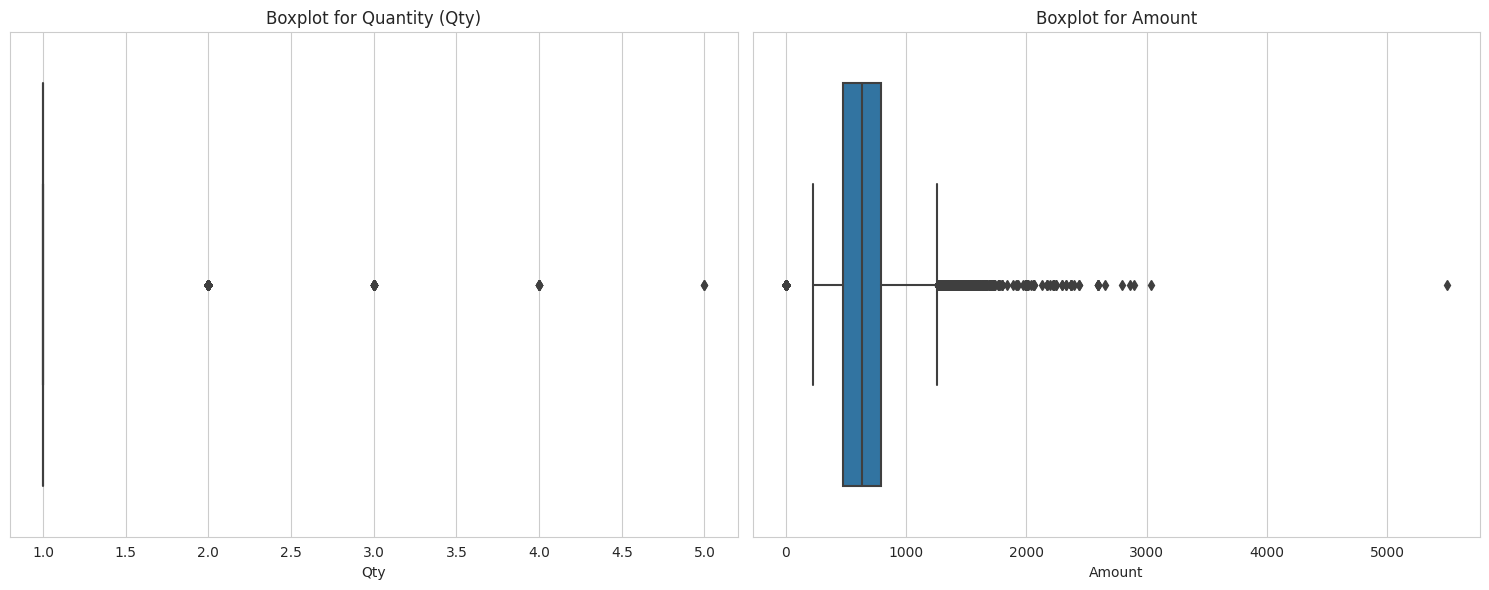

In [12]:


# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting boxplots to identify outliers in 'Qty' and 'Amount'
plt.figure(figsize=(15, 6))

# Plot for Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=cleaned_data_encoded['Qty'])
plt.title('Boxplot for Quantity (Qty)')

# Plot for Amount
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data_encoded['Amount'])
plt.title('Boxplot for Amount')

plt.tight_layout()
plt.show()

In [13]:
# Removing outliers based on the IQR method for 'Qty' and 'Amount'

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers from 'Qty' and 'Amount'
cleaned_data_no_outliers = remove_outliers(cleaned_data_encoded, 'Qty')
cleaned_data_no_outliers = remove_outliers(cleaned_data_no_outliers, 'Amount')

# Displaying the shape of the data after removing outliers
cleaned_data_no_outliers.shape

(75725, 37)

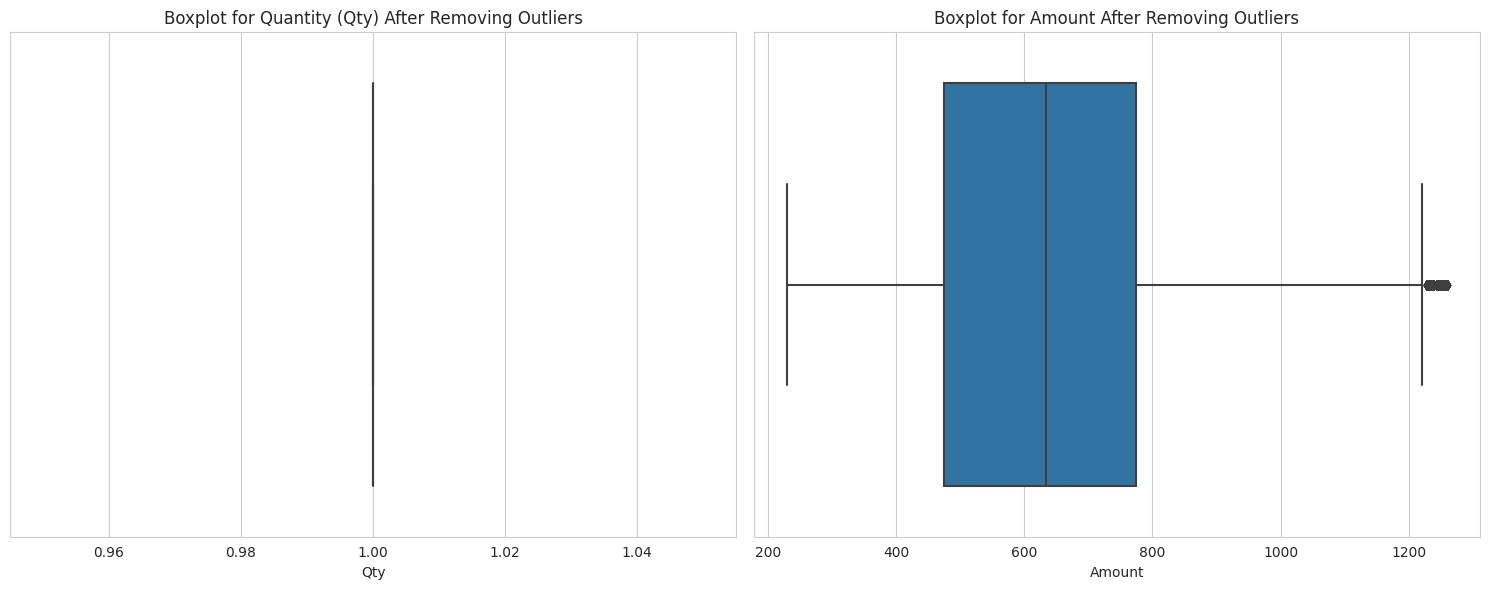

In [14]:
# Visualizing the results after removing outliers
plt.figure(figsize=(15, 6))

# Plot for Quantity after removing outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=cleaned_data_no_outliers['Qty'])
plt.title('Boxplot for Quantity (Qty) After Removing Outliers')

# Plot for Amount after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data_no_outliers['Amount'])
plt.title('Boxplot for Amount After Removing Outliers')

plt.tight_layout()
plt.show()

In [15]:
# Correlation analysis to identify key features related to 'Amount'
correlation_matrix = cleaned_data_no_outliers.corr()

# Focusing on the 'Amount' column
correlation_with_amount = correlation_matrix['Amount'].sort_values(ascending=False)

# Displaying the correlations
correlation_with_amount

<ipython-input-15-c6c78e89d7a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_data_no_outliers.corr()


Amount                                  1.000000
Category_Set                            0.529979
Category_Western Dress                  0.203341
Status_Shipped                          0.048169
ship-service-level_Expedited            0.048026
Category_Ethnic Dress                   0.039027
Category_Saree                          0.021744
Status_Shipped - Returning to Seller    0.010011
Status_Pending - Waiting for Pick Up    0.008136
Status_Shipped - Picked Up              0.007953
Status_Shipped - Damaged                0.007676
Status_Shipped - Out for Delivery       0.003256
Status_Cancelled                        0.000718
Status_Shipped - Rejected by Buyer      0.000530
B2B_True                                0.000510
Status_Pending                          0.000371
Status_Shipped - Lost in Transit        0.000345
B2B_False                              -0.000510
Category_Dupatta                       -0.009586
Status_Shipped - Returned to Seller    -0.010914
Category_Blouse     

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Selecting features with significant correlation (both positive and negative)
# Excluding features with no or very weak correlation
significant_features = correlation_with_amount[abs(correlation_with_amount) > 0.01].index.tolist()
significant_features.remove('Amount')  # Removing the target variable

# Preparing the data for the model
X = cleaned_data_no_outliers[significant_features]
y = cleaned_data_no_outliers['Amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(127.27121474856186, 165.96260667528549, 0.46394122947158634)

In [17]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

r2_ridge, r2_lasso


(0.46384688963288523, 0.4546726370889912)

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reapplying Ridge and Lasso Regression with scaled features
ridge_model_scaled = Ridge(alpha=1.0)
ridge_model_scaled.fit(X_train_scaled, y_train)
y_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)
r2_ridge_scaled = r2_score(y_test, y_pred_ridge_scaled)

lasso_model_scaled = Lasso(alpha=1.0)
lasso_model_scaled.fit(X_train_scaled, y_train)
y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)
r2_lasso_scaled = r2_score(y_test, y_pred_lasso_scaled)

r2_ridge_scaled, r2_lasso_scaled, ridge_model_scaled.coef_, lasso_model_scaled.coef_


(0.4639312175817246,
 0.4636260063614348,
 array([ 2.02325263e+02,  1.33820368e+02,  1.81363876e+00,  3.54626403e-02,
         3.27018507e+01,  1.51825111e+01,  3.31065656e-01, -2.72435086e+00,
         1.21832610e+01, -3.51269673e+00, -3.54626401e-02, -7.66313230e+00,
        -7.66849665e-01,  3.95186212e+01,  3.99612480e+01]),
 array([  28.69780821,    8.56825703,    1.43409857,    2.74256312,
           0.        ,    0.18843101,    0.        ,   -0.81829976,
         -14.74851428,   -2.46698887,   -0.25237597,   -4.07550531,
         -21.1123839 ,  -54.55615206, -129.44525569]))

In [19]:
# Simplified tuning approach for Ridge and Lasso models

# Range of alpha values for tuning (simplified)
alpha_range_simplified = [0.01, 0.1, 1, 10, 100]

# Simplified tuning for Ridge and Lasso
ridge_scores_simplified = {}
lasso_scores_simplified = {}

for alpha in alpha_range_simplified:
    # Tuning Ridge model
    ridge_model_tune = Ridge(alpha=alpha)
    ridge_model_tune.fit(X_train_scaled, y_train)
    r2_ridge_tune = r2_score(y_test, ridge_model_tune.predict(X_test_scaled))
    ridge_scores_simplified[alpha] = r2_ridge_tune

    # Tuning Lasso model
    lasso_model_tune = Lasso(alpha=alpha)
    lasso_model_tune.fit(X_train_scaled, y_train)
    r2_lasso_tune = r2_score(y_test, lasso_model_tune.predict(X_test_scaled))
    lasso_scores_simplified[alpha] = r2_lasso_tune

ridge_scores_simplified, lasso_scores_simplified

({0.01: 0.46394123291480716,
  0.1: 0.4639411054358913,
  1: 0.4639312175817246,
  10: 0.46384739984914547,
  100: 0.4638036862587257},
 {0.01: 0.4638722346205961,
  0.1: 0.46387053187011074,
  1: 0.4636260063614348,
  10: 0.45258292961011803,
  100: 0.16995136301962332})